In [30]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from Log_class import Long_cl
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score

import pandas as pd
initial_data = pd.read_csv('../lab5/data.csv')
initial_data.drop(initial_data.columns[0], axis=1, inplace=True)
for column in initial_data.columns:
    if "Unnamed" in column:
        initial_data.drop(column, axis = 1, inplace=True)

initial_data['diagnosis']=initial_data['diagnosis'].map({'M':1,'B':-1})


mas = []
for i in initial_data.columns:
    if i != 'diagnosis':
        mas.append(i)

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X = minmax.fit_transform(initial_data[mas])
y = initial_data['diagnosis']
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)



In [31]:
%%time
model = Long_cl(reg=0.0001, weights_type="random", lam=0.01, gam=0.09, epochs=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

CPU times: user 399 ms, sys: 1.09 s, total: 1.49 s
Wall time: 137 ms


0.9230769230769231

In [32]:
%%time
model = Long_cl(reg=0.0001, weights_type="corr", lam=0.01, gam=0.09, epochs=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

Корреляци присутствует
CPU times: user 310 ms, sys: 1.36 s, total: 1.67 s
Wall time: 154 ms


0.9370629370629371

In [ ]:
%%time
model = Long_cl(reg=0.0001, weights_type="random", lam=0.01, gam=0.09, epochs=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

CPU times: user 399 ms, sys: 1.09 s, total: 1.49 s
Wall time: 137 ms


0.9230769230769231

In [33]:
%%time
model = Long_cl(reg=0.0001, weights_type="multi", lam=0.01, gam=0.09, epochs=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

CPU times: user 249 ms, sys: 1.13 s, total: 1.38 s
Wall time: 122 ms


0.916083916083916

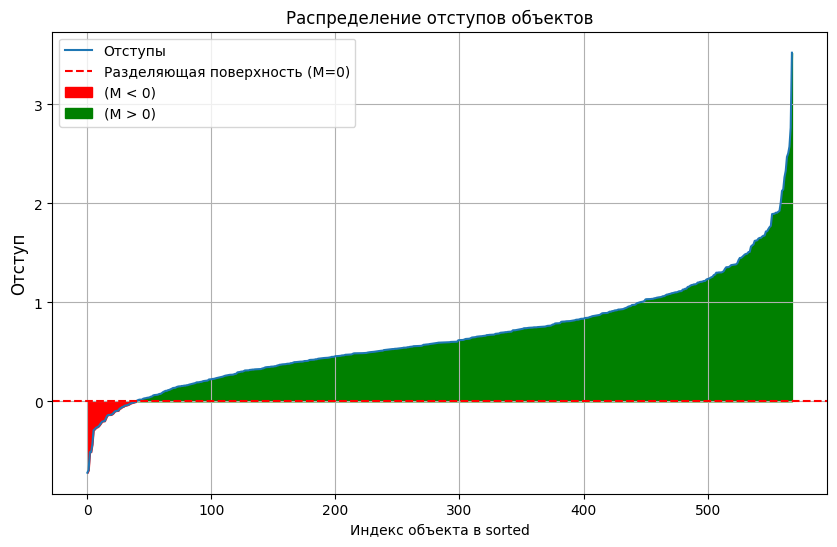

In [34]:
import numpy as np
k = model.indent(X, y)
k_sorted =  np.sort(k)


plt.figure(figsize=(10, 6))
plt.plot(k_sorted, linestyle='-', label="Отступы")
plt.axhline(0, color='red', linestyle='--', label="Разделяющая поверхность (M=0)")

plt.title("Распределение отступов объектов")
plt.xlabel("Индекс объекта в sorted")
plt.ylabel("Отступ", fontsize=12)

plt.fill_between(range(len(k_sorted)), k_sorted, 0, where=(k_sorted < 0), 
                 color='red', label="(M < 0)")

plt.fill_between(range(len(k_sorted)), k_sorted, 0, where=(k_sorted > 0), 
                 color='green', label="(M > 0)")

plt.legend(fontsize=10)
plt.grid(alpha=1)
plt.show()

In [35]:
%%time
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Создание модели
model_sgd = SGDClassifier(
    loss='squared_hinge',   
    penalty='l2',
    alpha=0.0001,          
    max_iter=1000,         
    learning_rate='constant', 
    eta0=0.09,             
    random_state=42
)
# Обучение модели
model.fit(X_train, y_train)

# Оценка качества
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9371
CPU times: user 201 ms, sys: 913 ms, total: 1.11 s
Wall time: 98.6 ms
